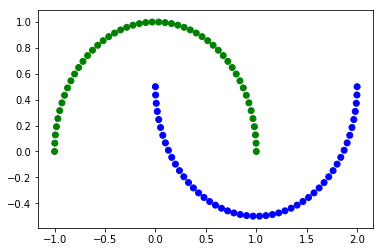

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets.samples_generator import *
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings

warnings.simplefilter("ignore")

moons = make_moons()
X = moons[0]  # Shape (100,2)
y = moons[1]  # Shape (100,)

colors = ['green', 'blue']
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors))
plt.show()

**Binary classification with bagging sampling (each estimator/predictor is trained on a random subset of the data set with replacement (return a sample back to the training set before taking the next sample). This obviously means that some instances may be picked up multiple times in the training set for the same predictor. The n_jobs parameter tells Scikit-Learn the number of CPU cores to use for training and predictions (–1 tells Scikit-Learn to use all available cores)**

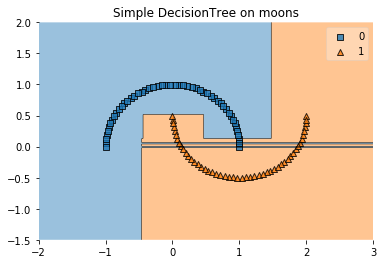

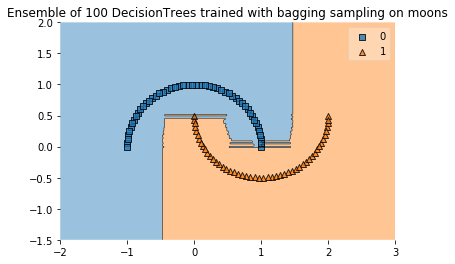

In [3]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    max_samples=100, bootstrap=True, n_jobs=1)

bag_clf.fit(X, y)

clf = DecisionTreeClassifier()
clf.fit(X, y)

plot_decision_regions(X, y, clf)
plt.title('Simple DecisionTree on moons')
plt.show()

plot_decision_regions(X, y, bag_clf)
plt.title('Ensemble of 100 DecisionTrees trained with bagging sampling on moons')
plt.show()

**Binary classification with pasting sampling (each predictor is trained on a random subset of the data set without replacement (do not return the sample back to the set before taking the next sample)This obviously means that unique instances will be picked up for each predictor**

**Both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to besampled several times for the same predictor**

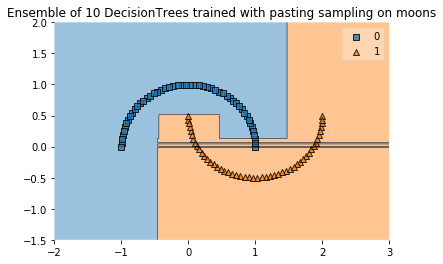

In [4]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    max_samples=100, bootstrap=False, n_jobs=1)

pasting_clf.fit(X, y)

plot_decision_regions(X, y, pasting_clf)
plt.title('Ensemble of 10 DecisionTrees trained with pasting sampling on moons')
plt.show()

**Out of bag evaluation With bagging, some instances may be sampled several times for any given predictor, while others may not be sampled at all. By default a BaggingClassifier samples m training instances with replacement (bootstrap=True), where m is the size of the training set. This means that only about 63% of the training instances are sampled on average for each predictor.The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances. Note that they are not the same 37% for all predictors.**

**Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set or cross-validation.**

In [5]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    max_samples=100, bootstrap=True, n_jobs=1, oob_score=True)

bag_clf.fit(X, y)
print("OOB score:", bag_clf.oob_score_)

OOB score: 0.96
